# Image Compression with Singular Value Decomposition

Singular value decomposition (SVD) can be a powerful tool for dimentionality reduction, known as PCA. However, there is also lot's of application of this linear algebra technique for compression. In this notebook I will show how to utilize SVD to compress an image of my beautiful alma mater (Go IRISH!)

# Environment and Photo Import

In [126]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as la
import matplotlib.image as mpimg
plt.style.use('fivethirtyeight')

img_path = './../../datasets/campus_aerial.png'
img = mpimg.imread(img_path)

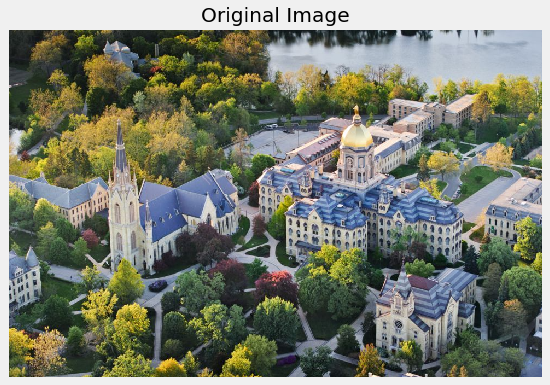

In [127]:
def plot_image(img):
    fig, ax  = plt.subplots(figsize = (12,6))
    ax.imshow(img)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    return fig, ax
fig, ax = plot_image(img)
ax.set_title("Original Image")
plt.show()

# SVD Formulation

## Decomposition Equation

The basics of the singular value decomposition is to perform a decomposition of a matrix $X$ with the following equation.

$X = U\Sigma V^{T}$

$U$ and $V$ are both unitary matricies, meaning their conjugate transposes are also their inverses, which allows for a lot of great application. $\Sigma$ is a rectangular diagonal matrix whose elements are non-negative scalers.

A trivial example of this decomposition is given below.

In [84]:
# simple decomposition
X = np.random.rand(3,2)
U, S_diag, Vt = la.svd(X)
S = np.zeros(X.shape)
np.fill_diagonal(S, S_diag)
print('X'); print(X); print()
print('U'); print(U); print('Σ'); print(S); print('V^(T)'); print(Vt)

X
[[0.09516777 0.38960874]
 [0.29200854 0.58893328]
 [0.17295148 0.59504788]]

U
[[-0.40495552  0.48586828 -0.7745599 ]
 [-0.66434689 -0.73839199 -0.11584683]
 [-0.62821513  0.46766365  0.62180099]]
Σ
[[0.98389824 0.        ]
 [0.         0.09434891]
 [0.         0.        ]]
V^(T)
[[-0.34676799 -0.93795094]
 [-0.93795094  0.34676799]]


## Property Checks

With the trivial example, let's check a few of the basic properties of the decomposition. A few of these important features are given below.

1. Basic formula: $X = U\Sigma V^{T}$
1. $U$ and $V^T$ are unitary

In [60]:
print('Check #1: Information Capture')
print(f'2-Norm Error: {la.norm(U@S@Vt - X):.2f}')

Check #1: Information Capture
2-Norm Error: 0.00


In [73]:
print('Check #2: Unitary Checks\n')
print('U*U^(T) Product (should be identity matrix)');print(U@U.T);
print(f'Inverse 2-Norm Error: {la.norm(U.T - la.inv(U)):.2f}');print()

print('V^(T)*V Product (should be identity matrix)');print(Vt@Vt.T)
print(f'Inverse 2-Norm Error: {la.norm(Vt.T - la.inv(Vt)):.2f}')

Check #2: Unitary Checks

U*U^(T) Product (should be identity matrix)
[[1.00000000e+00 9.97936045e-18 7.70882420e-17]
 [9.97936045e-18 1.00000000e+00 6.26942774e-17]
 [7.70882420e-17 6.26942774e-17 1.00000000e+00]]
Inverse 2-Norm Error: 0.00

V^(T)*V Product (should be identity matrix)
[[1.00000000e+00 2.13219747e-17]
 [2.13219747e-17 1.00000000e+00]]
Inverse 2-Norm Error: 0.00


## Exploiting Reconstruction with Less Singular Values

One of the most important properties of SVD is the ability to reconstruct the $X$ matrix without using all of the singular values. This is possible because the directions of the rows in $U$ point in the direction of maximum variance of the $X$ matrix, dropping in variance with each row.

This property can be exploited for compression of information with SVD. The simplist way to do this, it to set one or more of the singular values in the $\Sigma$ matrix to 0, then reconstruct the $X$ matrix. This is shown with the same example below.

In [91]:
print('Original Sigma'); print(S)

S_comp = S.copy()
S_comp[1,1] = 0
print('\nInformation Reduced Sigma'); print(S_comp)

print('\nOriginal X'); print(X)

X_recon = U@S_comp@Vt
print('\nReconstructed X'); print(X_recon)

print('\nInformation Loss (2-norm):')
loss = la.norm(X - X_recon) / la.norm(X)
print(f'{loss:.2f}')

Original Sigma
[[0.98389824 0.        ]
 [0.         0.09434891]
 [0.         0.        ]]

Information Reduced Sigma
[[0.98389824 0.        ]
 [0.         0.        ]
 [0.         0.        ]]

Original X
[[0.09516777 0.38960874]
 [0.29200854 0.58893328]
 [0.17295148 0.59504788]]

Reconstructed X
[[0.13816451 0.3737125 ]
 [0.22666481 0.61309138]
 [0.21433721 0.57974725]]

Information Loss (2-norm):
0.10


This is an incredibly interesting and exploitable feature of SVD with the ability to capture 90% of the variance in the data while only using 50% of the information!

# Extention of SVD to Images

Because images are simply matricies, SVD can be applied to an image in the exact same way the random matrix was used before. In this case we will use the black and white image to keep things simple (although this algorithm can just as easily be extended to RBG images).

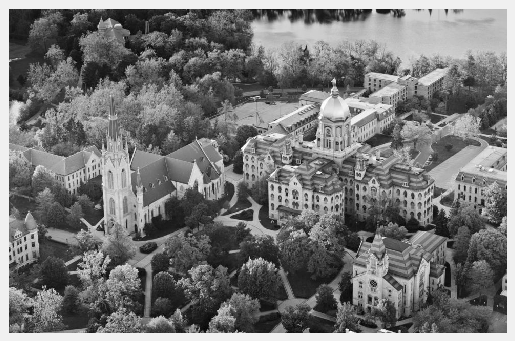

In [128]:
img_grey = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
def plot_img_grey(img_grey):
    fig, ax = plt.subplots(figsize = (8,8))
    ax.imshow(img_grey, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    return fig, ax
fig, ax = plot_img_grey(img_grey)
plt.show()

## Decomposition
Let's start with a simple decomposition, same as any other matrix.

In [138]:
U, S_diag, Vt = la.svd(img_grey)
S = np.zeros(img_grey.shape)
np.fill_diagonal(S, S_diag)

## Examining the Singular Values

The singular values ($\sigma_i$) from the matrix $\Sigma$ will give you an intuitive feel for how much informatino is contained in each added dimension (commonly known as Principal Component) of the SVD. The plot below shows how the singular values start to tail off quite quickly in regards to an image.

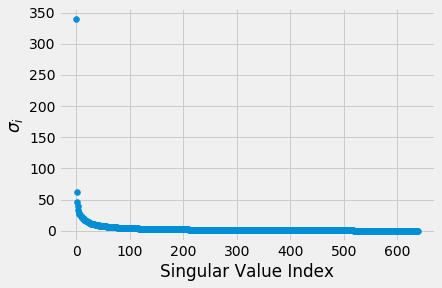

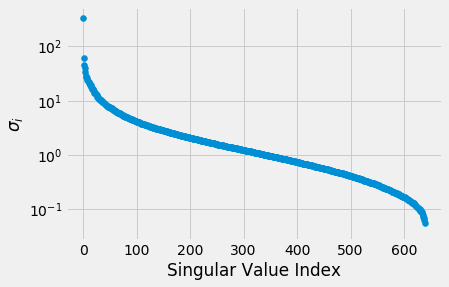

In [139]:
def plot_svs(S_diag, log=False):
    fig, ax = plt.subplots()
    ax.scatter(np.arange(S_diag.shape[0]), S_diag)
    if log:
        ax.set_yscale('log')
    ax.set_xlabel('Singular Value Index')
    ax.set_ylabel('$\sigma_i$')
    return fig, ax
fig, ax = plot_svs(S_diag, log=False)
fig, ax = plot_svs(S_diag, log=True)

## Reconstructing at Various Information Levels

Examinging the singular value graphs above, one would postulate that the original image can be reconstructed using only a few singular values. The plot below shows the reconstruction of the image with only 1 singular value. This graph shows how the first singular value doesn't provide that much information to the naked eye about the image. However, you are looking at 640 dimensions, squeezed into 2...

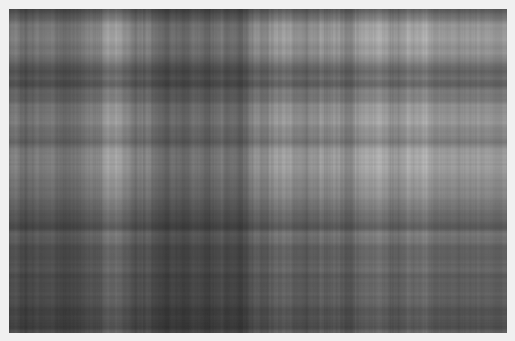

In [165]:
def drop_singular_values(S, n_s = 1):
    S_comp = S.copy()
    drop_ind = np.arange(min(S_comp.shape))
    drop_ind = drop_ind[int(n_s):]
    S_comp[drop_ind,drop_ind] = 0
    return S_comp

S_comp = drop_singular_values(S, n_s = 1)
img_recon = U@S_comp@Vt
fig, ax = plot_img_grey(img_recon)
plt.show()

Let's see what happens when we start using more singular values. The following images represent the reconstruction of the image using 1, 5, and 10% of $\sigma_i$ values.

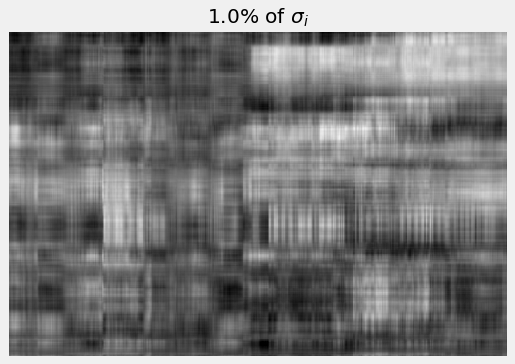

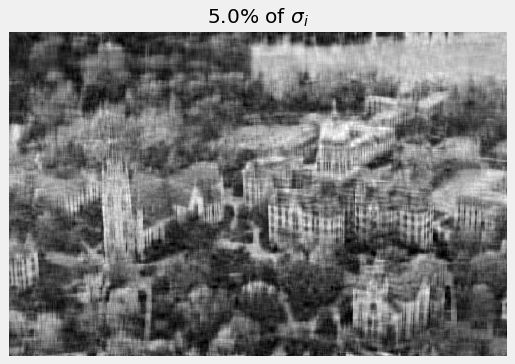

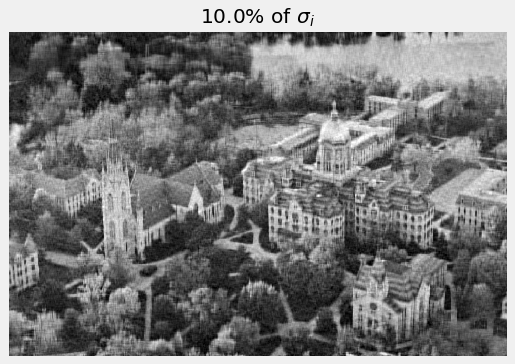

In [166]:
percents = np.array([0.01, 0.05, 0.1])
s_values = np.round(min(S.shape)*percents)

for ind, n_s in enumerate(s_values):
    S_comp = drop_singular_values(S, n_s = n_s)
    img_recon = U@S_comp@Vt
    fig, ax = plot_img_grey(img_recon)
    ax.set_title(f'{percents[ind]*100}% of $\sigma_i$')
    plt.show()

It is somewhat incredible that the level of the image construction gives the basic stucture by using less than 10% of the information contained in the image!

## Information Compression Curve

The three images above ask the following question: how much informatino is lost at each singular value. The plot below shows the error of image reconstruction (2-norm). 

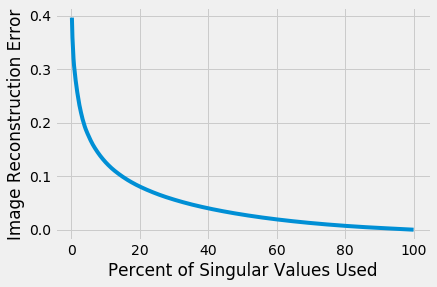

In [176]:
n_s_vec = np.arange(S.shape[0]) + 1
img_error = []
for n_s in n_s_vec:
    S_comp = drop_singular_values(S, n_s = n_s)
    img_recon = U@S_comp@Vt
    img_error.append(la.norm(img_grey - img_recon) / la.norm(img_grey))
fig, ax = plt.subplots()
ax.plot(n_s_vec / n_s_vec.shape[0] * 100, img_error)
ax.set_xlabel('Percent of Singular Values Used')
ax.set_ylabel('Image Reconstruction Error')
plt.show()

## Visual Comparision

To give an idea of the compression levels and how they compare, the two images below show how little difference there is in the original image and a 80% reduction in singular values.

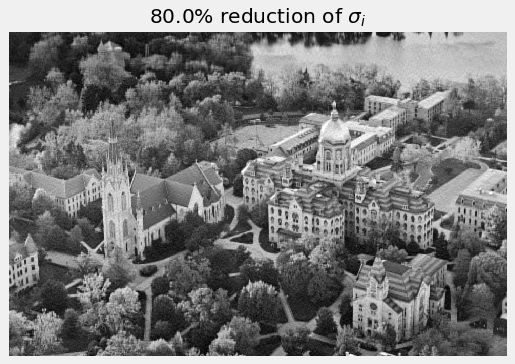

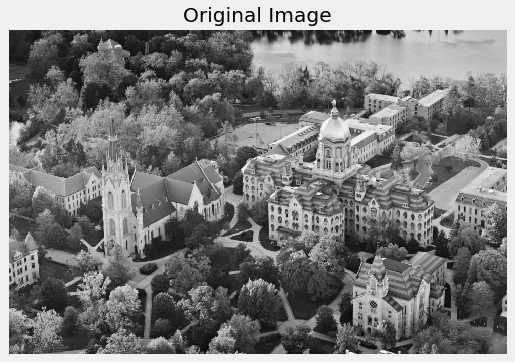

In [183]:
percent = 0.2
n_s = min(S.shape)*percent
S_comp = drop_singular_values(S, n_s = n_s)
img_recon = U@S_comp@Vt
fig, ax = plot_img_grey(img_recon)
ax.set_title(f'{100 - percent*100}% reduction of $\sigma_i$')
plt.show()
fig, ax = plot_img_grey(img_grey)
ax.set_title('Original Image')
plt.show()